<a href="https://colab.research.google.com/github/GabrielWalak/Eksploracja-danych/blob/main/Zadanie_integracja_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Zadanie

Dysponujesz danymi z portalu Our World in Data dotyczącymi:
- Pierwotnej konsumpcji energii
- Emisji CO2 z poszczególnych lat dla różnych krajów

## Część 1: Plik CSV
Utwórz plik CSV zawierający połączone dane dla Polski:
- konsumpcja energii pierwotnej
- emisja CO2
- dane z poszczególnych lat

## Część 2: Plik Excel
Stwórz plik Excel z osobnymi zakładkami dla każdego kraju:
- UE
- USA
- Chiny
- Indie

Każda zakładka powinna zawierać dane o konsumpcji energii i emisji CO2.

## Część 3: Baza danych SQLite
Utwórz bazę danych SQLite z tabelą zawierającą:
- kraj
- rok
- emisja CO2
- konsumpcja energii

Dane powinny obejmować: Polskę, Niemcy i Hiszpanię.

## Część 4: Analiza i wizualizacja
Na podstawie danych z pliku Excel i bazy SQLite utwórz wykresy:
- emisja CO2 w zależności od roku (dla wybranego kraju)
- konsumpcja energii pierwotnej w zależności od roku (dla wybranego kraju)
- **dla chęnych szukanie koreacji**

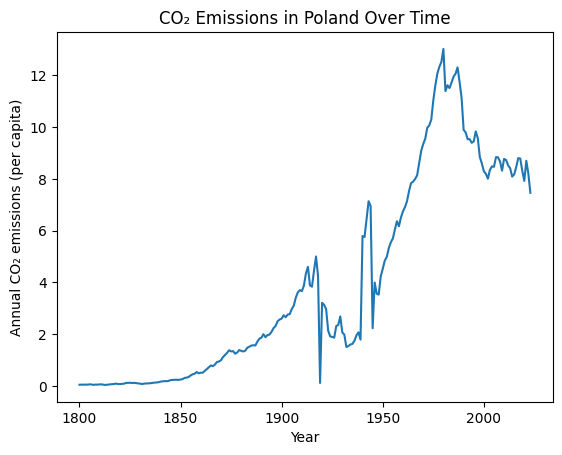

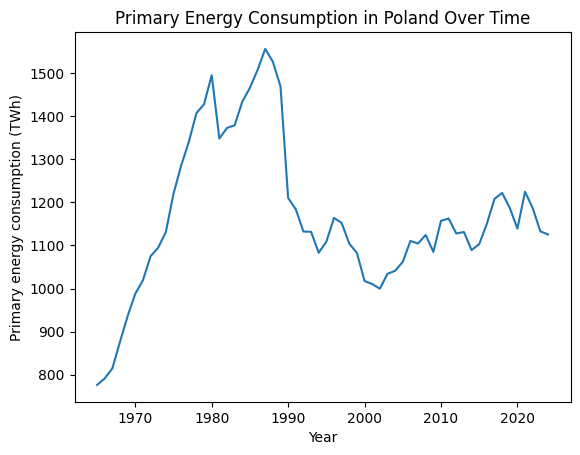

In [19]:
#4
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

df_co2 = pd.read_csv('co2-emissions-per-capita.csv')
df_primary_energy = pd.read_csv('primary-energy-cons.csv')

df_co2_poland = df_co2[df_co2['Entity'] == 'Poland']

plt.plot(df_co2_poland['Year'], df_co2_poland['Annual CO₂ emissions (per capita)'])
plt.xlabel('Year')
plt.ylabel('Annual CO₂ emissions (per capita)')
plt.title('CO₂ Emissions in Poland Over Time')
plt.show()

df_primary_energy_poland = df_primary_energy[df_primary_energy['Entity'] == 'Poland']

plt.plot(df_primary_energy_poland['Year'], df_primary_energy_poland['Primary energy consumption (TWh)'])
plt.xlabel('Year')
plt.ylabel('Primary energy consumption (TWh)')
plt.title('Primary Energy Consumption in Poland Over Time')
plt.show()

In [ ]:
df_co2 = pd.read_csv("/content/co2-emissions-per-capita.csv")
df_co2.head()

,Entity,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.010837
2,Afghanistan,1951,0.011625
3,Afghanistan,1952,0.011468
4,Afghanistan,1953,0.013123


In [ ]:
df_primary_energy = pd.read_csv("/content/primary-energy-cons.csv")
df_primary_energy.head()

,Entity,Code,Year,Primary energy consumption (TWh)
0,Afghanistan,AFG,1980,6.337187
1,Afghanistan,AFG,1981,7.289555
2,Afghanistan,AFG,1982,7.889244
3,Afghanistan,AFG,1983,9.882159
4,Afghanistan,AFG,1984,9.929878


In [31]:
#1
import pandas as pd

energia = pd.read_csv('primary-energy-cons.csv')
co2 = pd.read_csv('co2-emissions-per-capita.csv')

polska_energia = energia[energia['Entity'] == 'Poland']
polska_co2 = co2[co2['Entity'] == 'Poland']
polska = pd.merge(polska_energia, polska_co2, on=['Entity', 'Year'])

polska.to_csv('polska_dane.csv', index=False)

In [28]:
#2
import pandas as pd

energia = pd.read_csv('primary-energy-cons.csv')
co2 = pd.read_csv('co2-emissions-per-capita.csv')
dane = pd.merge(energia, co2, on=['Entity', 'Year'])

ue = dane[dane['Entity'] == 'European Union (27)']
usa = dane[dane['Entity'] == 'United States']
chiny = dane[dane['Entity'] == 'China']
indie = dane[dane['Entity'] == 'India']

# Zapisz do Excela z zakładkami
with pd.ExcelWriter('kraje_energia_co2.xlsx', engine='openpyxl') as writer:
    ue.to_excel(writer, sheet_name='UE', index=False)
    usa.to_excel(writer, sheet_name='USA', index=False)
    chiny.to_excel(writer, sheet_name='Chiny', index=False)
    indie.to_excel(writer, sheet_name='Indie', index=False)

print("Gotowe! Zapisano do kraje_energia_co2.xlsx")
print(f"UE: {len(ue)} wierszy")
print(f"USA: {len(usa)} wierszy")
print(f"Chiny: {len(chiny)} wierszy")
print(f"Indie: {len(indie)} wierszy")

Gotowe! Zapisano do kraje_energia_co2.xlsx
UE: 59 wierszy
USA: 59 wierszy
Chiny: 59 wierszy
Indie: 59 wierszy


In [30]:
#3
import pandas as pd
import sqlite3

# Wczytaj pliki
energia = pd.read_csv('primary-energy-cons.csv')
co2 = pd.read_csv('co2-emissions-per-capita.csv')
dane = pd.merge(energia, co2, on=['Entity', 'Year'])

kraje = dane[dane['Entity'].isin(['Poland', 'Germany', 'Spain'])]
kraje = kraje.rename(columns={
    'Entity': 'kraj',
    'Year': 'rok',
    'Primary energy consumption (TWh)': 'konsumpcja_energii',
    'Annual CO₂ emissions (per capita)': 'emisja_co2'
})

kraje = kraje[['kraj', 'rok', 'emisja_co2', 'konsumpcja_energii']]

conn = sqlite3.connect('energia_co2.db')

kraje.to_sql('dane_energii', conn, if_exists='replace', index=False)

print(f"\nLiczba rekordów: {len(kraje)}")
print(f"Polska: {len(kraje[kraje['kraj']=='Poland'])} wierszy")
print(f"Niemcy: {len(kraje[kraje['kraj']=='Germany'])} wierszy")
print(f"Hiszpania: {len(kraje[kraje['kraj']=='Spain'])} wierszy")

# Przykładowe zapytanie
print("\n=== Przykładowe dane ===")
wynik = pd.read_sql_query("SELECT * FROM dane_energii LIMIT 10", conn)
print(wynik)

conn.close()


Liczba rekordów: 177
Polska: 59 wierszy
Niemcy: 59 wierszy
Hiszpania: 59 wierszy

=== Przykładowe dane ===
      kraj   rok  emisja_co2  konsumpcja_energii
0  Germany  1965   12.638417           2969.2932
1  Germany  1966   12.418865           2977.0012
2  Germany  1967   12.163438           2969.4314
3  Germany  1968   12.736349           3170.4126
4  Germany  1969   13.496877           3419.7780
5  Germany  1970   13.119634           3611.0166
6  Germany  1971   13.239201           3643.5570
7  Germany  1972   13.230207           3770.2227
8  Germany  1973   13.749271           3987.3542
9  Germany  1974   13.452803           3918.0273
